In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
from pathlib import Path

## Real data grouped by day and mean T_MEAN

In [21]:
files = Path('data/real/').glob('real*')

In [22]:
dfs = [pd.read_csv(file) for file in files]

In [24]:
series = []
for df in dfs:
    df['day'] = pd.to_datetime(df['day'], format='%d/%m/%Y')
    series.append(df.groupby('day')['T_MEAN'].mean())

In [25]:
grouped = pd.concat(series)

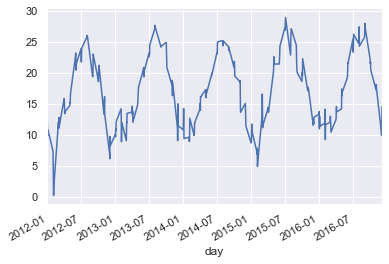

In [26]:
grouped.plot()

In [27]:
grouped.to_csv('data/real/real_t_mean_by_day.csv', header=['t_mean'])

In [28]:
grouped = grouped.to_frame()

In [29]:
grouped.head()

,T_MEAN
day,
2016-01-01,13.346026
2016-01-02,13.754347
2016-01-03,10.978352
2016-01-04,12.972968
2016-01-05,11.388333


## Join official and no official stations

In [30]:
offi_stations = pd.read_excel('data/data_S2_S3_S4.xlsx')
nonoffi_stations = pd.read_excel('data/data_NoOfficial.xlsx')

In [31]:
offi_stations['DATA'] = pd.to_datetime(offi_stations['DATA'])
nonoffi_stations['Date'] = pd.to_datetime(nonoffi_stations['Date'])
offi_stations = offi_stations.set_index('DATA')
nonoffi_stations = nonoffi_stations.set_index('Date')